<a href="https://colab.research.google.com/github/JinLeeGG/AI_Project_Preparation/blob/main/3.%20Data%20Analysis/11.%20Hotel%20booking%20demand/11_Hotel_booking_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ryuzyproject.tistory.com/73

dataset : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

# 1. 호텔 예약 수요 데이터셋
[호텔 예약 수요 데이터셋](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)은 일반적으로 호텔 예약에 대한 수요 패턴을 분석하기 위한 데이터셋입니다. 이 데이터셋은 예약 취소, 체크인 날짜, 고객 유형, 체류 기간, 객실 유형, 예약 경로 등 다양한 요소를 포함하며, 주로 예약 트렌드 분석, 고객 행동 예측, 수요 예측 등에 사용됩니다.

# 2. 데이터셋 컬럼 설명
* hotel: 호텔 유형 (Resort Hotel, City Hotel)
* is_canceled: 예약 취소 여부 (0: 예약 유지, 1: 예약 취소)
* lead_time: 예약과 실제 체크인 사이의 기간(일 단위)
* arrival_date_year: 도착 연도
* arrival_date_month: 도착 월
* arrival_date_week_number: 해당 연도의 주
* arrival_date_day_of_month: 도착 일
* stays_in_weekend_nights: 주말(토, 일) 동안의 숙박일 수
* stays_in_week_nights: 주중(월~금) 동안의 숙박일 수
* adults: 성인 투숙객 수
* children: 어린이 투숙객 수
* babies: 유아 투숙객 수
* meal: 예약된 식사 유형
* country: 고객의 국가
* market_segment: 예약 시장 세그먼트
* distribution_channel: 예약 채널 (예: 온라인, 오프라인)
* is_repeated_guest: 재방문 여부
* previous_cancellations: 이전 예약 취소 횟수
* reserved_room_type: 예약된 객실 유형
* assigned_room_type: 실제 배정된 객실 유형
* booking_changes: 예약 변경 횟수
* deposit_type: 보증금 유형 (No Deposit, Non Refund, Refundable)
* days_in_waiting_list: 대기자 명단에 있었던 일 수
* customer_type: 고객 유형 (예: Transient, Group)
* adr: 평균 일일 요금 (유로)
* required_car_parking_spaces: 주차 공간 요구 수
* total_of_special_requests: 특별 요청 수
* reservation_status: 예약 상태 (Check-Out, Canceled, No-Show)
* reservation_status_date: 예약 상태가 마지막으로 업데이트된 날짜


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Python_Computer Vision With AI/3. Data Analysis/data/hotel_bookings.csv')
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [58]:
# 목표 : 호텔 예약 취소 여부를 맞추는 모델 (분류-Classification)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [59]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


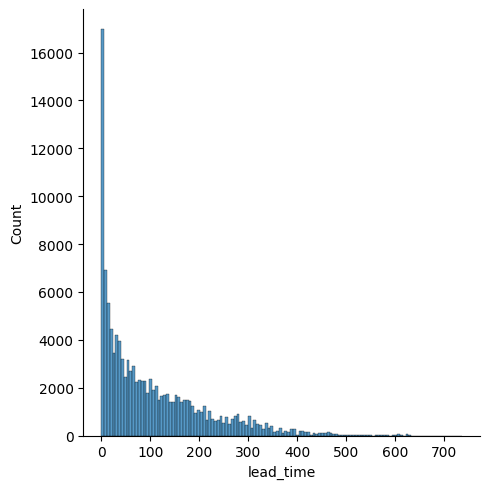

In [60]:
sns.displot(hotel_df['lead_time']) # 예약과 실제 체크인 사이의 기간(일 단위)

<Axes: ylabel='lead_time'>

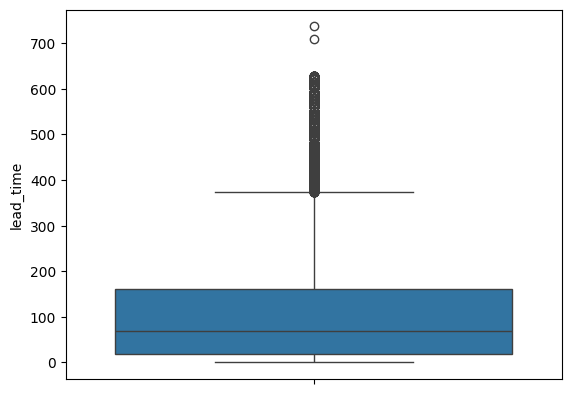

In [61]:
sns.boxplot(hotel_df['lead_time']) # 이상치가 좀 있다.

In [62]:
# 이상치 제거 과정
Q1 = hotel_df['lead_time'].quantile(0.25) # 1사분위수
Q3 = hotel_df['lead_time'].quantile(0.75) # 3사분위수

In [63]:
print(Q1)
print(Q3)

18.0
160.0


In [64]:
# IQR 구하기
# 이상치 기준 구하는법
# Tukey
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-195.0
373.0


In [65]:
# readtime이 lowerbound보다 크고, upperbound보다 작거나 같은거만 df에 포함시킨다.
hotel_df = hotel_df[(hotel_df['lead_time'] >= lower_bound) & (hotel_df['lead_time'] <= upper_bound)]
len(hotel_df)

116385

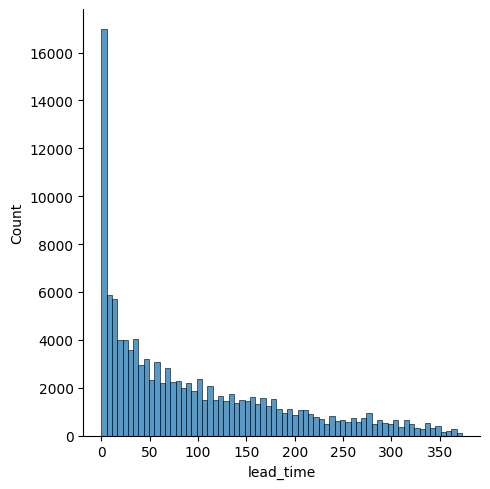

In [66]:
# boxplot 확인 (데이터가 날아간걸 확인할수 있다.)
sns.displot(hotel_df['lead_time']) # 예약과 실제 체크인 사이의 기간(일 단위)

<Axes: ylabel='lead_time'>

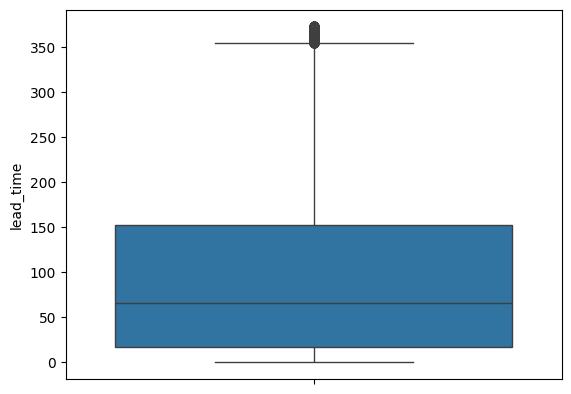

In [67]:
sns.boxplot(hotel_df['lead_time'])

<Axes: xlabel='distribution_channel', ylabel='is_canceled'>

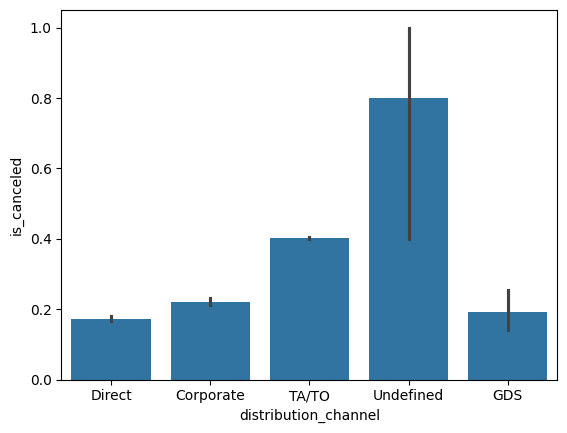

In [68]:
# 예약할 채널중에서 취소할 확률
sns.barplot(x=hotel_df['distribution_channel'], y=hotel_df['is_canceled']) # 어디를 통해서 예약을 하는지 확인

In [69]:
# 가장 많다고 생각했던 undefined가 5개밖에 안된다. (신빙성이 떨어진다.)
# 선이 짧을수록 더 정확하다.
hotel_df['distribution_channel'].value_counts() # 각 항목별 몇개인지 확인

,count
distribution_channel,
TA/TO,94968
Direct,14619
Corporate,6600
GDS,193
Undefined,5


<Axes: xlabel='hotel', ylabel='is_canceled'>

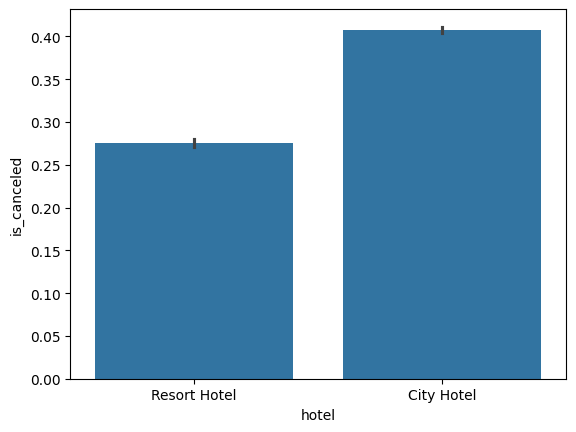

In [70]:
# 호텔 유형별 취소율 (0 ~ 1)
sns.barplot(x=hotel_df['hotel'], y=hotel_df['is_canceled'])

<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

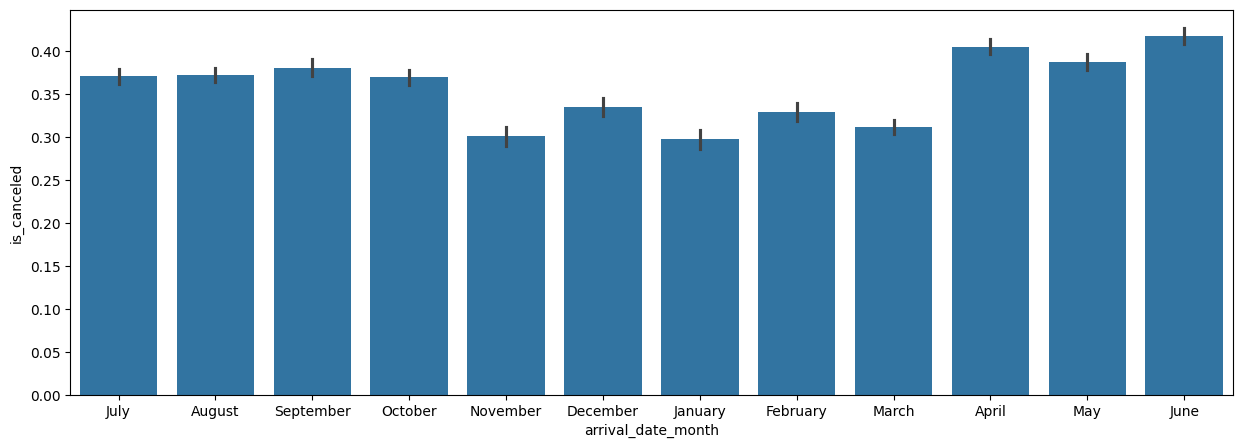

In [71]:
# Month에 따른 취소율 비교
# 달 별로 정렬이 되어 있지 않다.
plt.figure(figsize=(15, 5))
sns.barplot(x=hotel_df['arrival_date_month'], y=hotel_df['is_canceled'])

In [72]:
# 월별로 정렬 과정
import calendar

print(calendar.month_name[1])
print(calendar.month_name[2])
print(calendar.month_name[3])

January
February
March


In [73]:
months = []
for i in range(1, 13):
    months.append(calendar.month_name[i])

months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

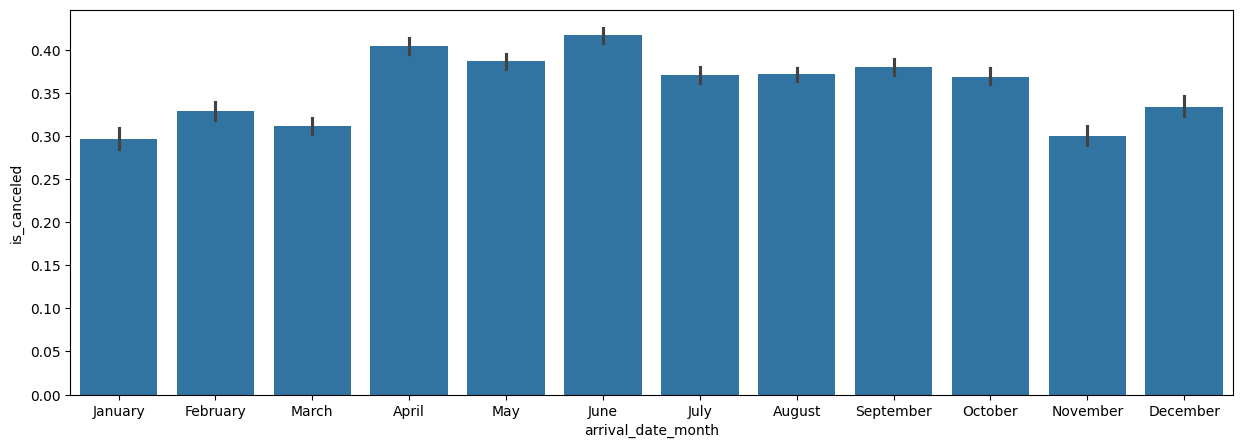

In [74]:
# 아까처럼 bar plot을 그리는데 order를 month 순으로 만들기
plt.figure(figsize=(15, 5))
sns.barplot(x=hotel_df['arrival_date_month'], y=hotel_df['is_canceled'], order=months)

In [75]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116385 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116385 non-null  object 
 1   is_canceled                     116385 non-null  int64  
 2   lead_time                       116385 non-null  int64  
 3   arrival_date_year               116385 non-null  int64  
 4   arrival_date_month              116385 non-null  object 
 5   arrival_date_week_number        116385 non-null  int64  
 6   arrival_date_day_of_month       116385 non-null  int64  
 7   stays_in_weekend_nights         116385 non-null  int64  
 8   stays_in_week_nights            116385 non-null  int64  
 9   adults                          116385 non-null  int64  
 10  children                        116381 non-null  float64
 11  babies                          116385 non-null  int64  
 12  meal                 

In [76]:
hotel_df.isna().sum() # null값 찾기

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [77]:
# 애들을 몇명을 데려오는지 확인 (null값이 표현이 되지 않는다.)
hotel_df['children'].value_counts()

,count
children,
0.0,107798
1.0,4856
2.0,3650
3.0,76
10.0,1


In [78]:
hotel_df['children'].value_counts(dropna=False) # 4명인걸 확인 가능하다.

,count
children,
0.0,107798
1.0,4856
2.0,3650
3.0,76
NaN,4
10.0,1


In [79]:
hotel_df['children'] = hotel_df['children'].fillna(0) # na값들을 0으로 만들기

/tmp/ipython-input-79-1488282633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['children'] = hotel_df['children'].fillna(0) # na값들을 0으로 만들기


In [80]:
hotel_df['children'].value_counts(dropna=False)

,count
children,
0.0,107802
1.0,4856
2.0,3650
3.0,76
10.0,1


In [81]:
# 어른 0명인걸 찾아보기 또는 - 값
hotel_df[hotel_df['adults'] == 0] #401개가 어른이 없다. 가능한가?

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,...,No Deposit,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-07-31
117274,City Hotel,0,276,2017,July,31,30,2,1,0,...,No Deposit,9.0,NaN,0,Transient,93.64,0,2,Check-Out,2017-08-02
117303,City Hotel,0,291,2017,July,30,29,2,2,0,...,No Deposit,9.0,NaN,0,Transient,98.85,0,1,Check-Out,2017-08-02
117453,City Hotel,0,159,2017,July,31,31,1,3,0,...,No Deposit,9.0,NaN,0,Transient,121.88,0,1,Check-Out,2017-08-04


In [82]:
# people 파생변수 - 모든 사람종류를 하나로 합치자
hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df.head()

/tmp/ipython-input-82-1977716121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [83]:
# 합쳤는데 people이 0명인건 말이 되지 않는다.
hotel_df[hotel_df['people'] == 0] #179개가 나온다.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


In [84]:
# people이 0인것을 drop시킨다음 적용
hotel_df.drop(hotel_df[hotel_df['people'] == 0].index, inplace=True)

/tmp/ipython-input-84-2755393642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(hotel_df[hotel_df['people'] == 0].index, inplace=True)


In [85]:
hotel_df[hotel_df['people'] == 0] # 이제 없다.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people


In [86]:
hotel_df.drop(['adults', 'children', 'babies'], axis = 1, inplace=True) # 성인, 어린이, 아기는 필요없으므로 드랍시킨다.

/tmp/ipython-input-86-3501904073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['adults', 'children', 'babies'], axis = 1, inplace=True) # 성인, 어린이, 아기는 필요없으므로 드랍시킨다.


In [87]:
hotel_df.head() # 드랍된거 확인

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [88]:
# 주말, 주중 숙박일수를 하나로 합친다.
hotel_df['total_nights'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']
hotel_df.head()

/tmp/ipython-input-88-3633800055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['total_nights'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [89]:
hotel_df.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True) # 주중, 주말 숙박일수 삭제

/tmp/ipython-input-89-614808006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True) # 주중, 주말 숙박일수 삭제


In [90]:
hotel_df.head() # 드랍 확인

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2
5,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [91]:
# Month를 12개를 나누는것보다 3개월씩 4계절로 해서 나누는게 더 효율적일것이다.
# season 파생변수
# arrival_date_month에 따라 아래와 같이 값을 저장
# 12, 1, 2: winter
# 3, 4, 5: spring
# 6, 7, 8: summer
# 9, 10, 11: fall

season_dic = {'spring':[3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11], 'winter': [12, 1, 2]}

new_season_dic = {}

for i in season_dic:
    for j in season_dic[i]:
        new_season_dic[calendar.month_name[j]] = i

new_season_dic


{'March': 'spring',
 'April': 'spring',
 'May': 'spring',
 'June': 'summer',
 'July': 'summer',
 'August': 'summer',
 'September': 'fall',
 'October': 'fall',
 'November': 'fall',
 'December': 'winter',
 'January': 'winter',
 'February': 'winter'}

In [92]:
hotel_df['season'] = hotel_df['arrival_date_month'].map(new_season_dic) # 월 이름을 참조해서 각 계절을 넣어준다.
hotel_df.head() # 계절 추가 확인

/tmp/ipython-input-92-3579386137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['season'] = hotel_df['arrival_date_month'].map(new_season_dic) # 월 이름을 참조해서 각 계절을 넣어준다.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer
5,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer


In [93]:
hotel_df.drop(['arrival_date_month'], axis=1, inplace=True) # month를 없애준다.

/tmp/ipython-input-93-4213211536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['arrival_date_month'], axis=1, inplace=True) # month를 없애준다.


In [94]:
hotel_df.head() # 확인

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer


In [95]:
# 배정된 룸과 예약된 룸 비교 파생변수
# 배정된 룸과 예약된 룸이 같으면 1 아니면 0으로 설정
hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype(int)
hotel_df.head()

/tmp/ipython-input-95-1502400097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype(int)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1


In [96]:
# 배정된 룸과 예약된 룸은 필요없음으로 삭제
hotel_df.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)

/tmp/ipython-input-96-1943536771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['reserved_room_type', 'assigned_room_type'], axis=1, inplace=True)


In [97]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1


In [98]:
# 전에 취소한 횟수와 취소되지 않은 횟수를 합쳐서 취소율 파생변수를 만든다.
hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])
hotel_df.head() # 0으로 나눈값들은 NAN이 된다.

/tmp/ipython-input-98-2340666699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1,NaN
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0,NaN
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1,NaN
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN


In [99]:
hotel_df[hotel_df['cancel_rate'].isna()] # na값 확인 (처음온사람들)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.00,0,0,Check-Out,2015-07-01,2.0,0,summer,1,NaN
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.00,0,0,Check-Out,2015-07-02,1.0,1,summer,0,NaN
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.00,0,0,Check-Out,2015-07-02,1.0,1,summer,1,NaN
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.00,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.00,0,1,Check-Out,2015-07-03,2.0,2,summer,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,BB,BEL,Offline TA/TO,TA/TO,...,96.14,0,0,Check-Out,2017-09-06,2.0,7,summer,1,NaN
119386,City Hotel,0,102,2017,35,31,BB,FRA,Online TA,TA/TO,...,225.43,0,2,Check-Out,2017-09-07,3.0,7,summer,1,NaN
119387,City Hotel,0,34,2017,35,31,BB,DEU,Online TA,TA/TO,...,157.71,0,4,Check-Out,2017-09-07,2.0,7,summer,1,NaN
119388,City Hotel,0,109,2017,35,31,BB,GBR,Online TA,TA/TO,...,104.40,0,0,Check-Out,2017-09-07,2.0,7,summer,1,NaN


In [100]:
# 처음온 사람들은 -1로 표기한다.
hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-1)
hotel_df.head()

/tmp/ipython-input-100-3317076013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1,-1.0
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0,-1.0
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1,-1.0
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,-1.0
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,-1.0


In [101]:
# 컬럼 삭제
hotel_df.drop(['previous_cancellations', 'previous_cancellations'], axis=1, inplace=True)
hotel_df.head()

/tmp/ipython-input-101-1958523517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['previous_cancellations', 'previous_cancellations'], axis=1, inplace=True)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,27,1,BB,PRT,Direct,Direct,...,0.0,0,0,Check-Out,2015-07-01,2.0,0,summer,1,-1.0
2,Resort Hotel,0,7,2015,27,1,BB,GBR,Direct,Direct,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,0,-1.0
3,Resort Hotel,0,13,2015,27,1,BB,GBR,Corporate,Corporate,...,75.0,0,0,Check-Out,2015-07-02,1.0,1,summer,1,-1.0
4,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,-1.0
5,Resort Hotel,0,14,2015,27,1,BB,GBR,Online TA,TA/TO,...,98.0,0,1,Check-Out,2015-07-03,2.0,2,summer,1,-1.0


In [102]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116206 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116206 non-null  object 
 1   is_canceled                     116206 non-null  int64  
 2   lead_time                       116206 non-null  int64  
 3   arrival_date_year               116206 non-null  int64  
 4   arrival_date_week_number        116206 non-null  int64  
 5   arrival_date_day_of_month       116206 non-null  int64  
 6   meal                            116206 non-null  object 
 7   country                         115728 non-null  object 
 8   market_segment                  116206 non-null  object 
 9   distribution_channel            116206 non-null  object 
 10  is_repeated_guest               116206 non-null  int64  
 11  previous_bookings_not_canceled  116206 non-null  int64  
 12  booking_changes      

In [103]:
# nan이 있는 값들 확인
# 머신러닝에는 NaN값, 문자 둘다 안된다.
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
meal,0
country,478
market_segment,0
distribution_channel,0


In [104]:
# Agent 값 확인
# 각 회사가 번호로 되어 있고 그 회사를 통해 예약한 수가 들어있다.
# NaN은 -1을 넣어보자 (알려지지 않은 회사)
hotel_df['agent'].value_counts(dropna=False).sort_index()

,count
agent,
1.0,5907
2.0,159
3.0,1294
4.0,47
5.0,330
...,...
526.0,10
527.0,35
531.0,68


In [105]:
hotel_df['agent'] = hotel_df['agent'].fillna(-1) # 기타회사

/tmp/ipython-input-105-3291618945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['agent'] = hotel_df['agent'].fillna(-1) # 기타회사


In [106]:
# Company 확인
# 숫자로 되어있고 각 회사들의 카운트가 들어있다.
hotel_df['company'].value_counts(dropna=False).sort_index()

,count
company,
6.0,1
8.0,1
9.0,37
10.0,1
11.0,1
...,...
534.0,2
539.0,2
541.0,1


In [107]:
hotel_df['company'] = hotel_df['company'].fillna(-1) # 기타를 -1로 설정

/tmp/ipython-input-107-141897714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['company'] = hotel_df['company'].fillna(-1) # 기타를 -1로 설정


In [108]:
hotel_df.isna().sum() # NaN값이 삭제가 되었나 확인

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
meal,0
country,478
market_segment,0
distribution_channel,0


In [110]:
hotel_df.select_dtypes(exclude=['number']).columns.tolist() # One-hot-Encoding 해줘야할것들

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'season']

In [111]:
# 각각의 카테고리 프린트
# Country, 날짜는 필요없을것같다.
for i in hotel_df.select_dtypes(exclude=['number']).columns.tolist():
    print(i, hotel_df[i].nunique())

hotel 2
meal 5
country 177
market_segment 8
distribution_channel 5
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926
season 4


In [112]:
# Country, 날짜 지우기
hotel_df.drop(['country', 'reservation_status_date'], axis=1, inplace=True)

/tmp/ipython-input-112-331487970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(['country', 'reservation_status_date'], axis=1, inplace=True)


In [113]:
# 나머지것들은 One-hot-Encoding 해준다.
# drop_first는 첫번째 column을 삭제시킨다.
hotel_df = pd.get_dummies(hotel_df, columns=hotel_df.select_dtypes(exclude=['number']).columns.tolist(), drop_first=True)
hotel_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_bookings_not_canceled,booking_changes,agent,company,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,season_spring,season_summer,season_winter
0,0,342,2015,27,1,0,0,3,-1.0,-1.0,...,False,False,False,True,False,True,False,False,True,False
2,0,7,2015,27,1,0,0,0,-1.0,-1.0,...,False,False,False,True,False,True,False,False,True,False
3,0,13,2015,27,1,0,0,0,304.0,-1.0,...,False,False,False,True,False,True,False,False,True,False
4,0,14,2015,27,1,0,0,0,240.0,-1.0,...,False,False,False,True,False,True,False,False,True,False
5,0,14,2015,27,1,0,0,0,240.0,-1.0,...,False,False,False,True,False,True,False,False,True,False


In [ ]:
# Train data, Test data 나눠서 학습시킨다.